### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Options

In [2]:
SEPARATOR = '|'
TEST_YEAR = 22

In [3]:
METEO_DATASET = "../data/DATOS_METEO.TXT"

In [4]:
GLOBAL_FIG_SIZE = (5, 10)

# 1. Loading and summarizing data

In [5]:
df = pd.read_csv(METEO_DATASET, sep=SEPARATOR)

In [6]:
df["validTimeUtc"] = pd.to_datetime(df["validTimeUtc"])
df["year"] = df["validTimeUtc"].dt.year
df["month"] = df["validTimeUtc"].dt.month
df["day"] = df["validTimeUtc"].dt.day
df.set_index("validTimeUtc", inplace=True)

In [7]:
df

,precip1Hour,precip6Hour,precip24Hour,precip2Day,precip3Day,precip7Day,precipMtd,precipYtd,pressureChange,pressureMeanSeaLevel,...,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed,ID_ESTACION,year,month,day
validTimeUtc,,,,,,,,,,,,,,,,,,,,,
2015-06-29 16:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.4,NaN,...,34.5,2.0,16.09,NaN,NaN,18.7,13,2015,6,29
2015-06-29 17:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,...,34.3,1.0,16.09,NaN,NaN,18.0,13,2015,6,29
2015-06-29 18:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.3,NaN,...,32.8,0.0,16.09,NaN,NaN,16.6,13,2015,6,29
2015-06-29 19:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.3,NaN,...,31.0,0.0,16.09,NaN,NaN,15.1,13,2015,6,29
2015-06-29 20:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.9,NaN,...,28.0,0.0,16.09,NaN,NaN,10.1,13,2015,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 19:20:00,0.0,0.0,0.0,0.0,0.0,2.0,9.0,238.0,2.7,1011.9,...,25.1,0.0,13.55,110.0,NaN,10.8,8,2022,6,30
2022-06-30 20:20:00,0.0,0.0,0.0,0.0,0.0,2.0,9.0,238.0,3.7,1013.1,...,22.9,0.0,13.59,80.0,NaN,9.0,8,2022,6,30
2022-06-30 21:20:00,0.0,0.0,0.0,0.0,0.0,2.0,9.0,238.0,3.8,1014.4,...,21.0,0.0,13.85,80.0,NaN,7.9,8,2022,6,30


In [8]:
df.dtypes

precip1Hour                float64
precip6Hour                float64
precip24Hour               float64
precip2Day                 float64
precip3Day                 float64
precip7Day                 float64
precipMtd                  float64
precipYtd                  float64
pressureChange             float64
pressureMeanSeaLevel       float64
relativeHumidity           float64
snow1Hour                  float64
snow6Hour                  float64
snow24Hour                 float64
snow2Day                   float64
snow3Day                   float64
snow7Day                   float64
snowMtd                    float64
snowSeason                 float64
snowYtd                    float64
temperature                float64
temperatureChange24Hour    float64
temperatureMax24Hour       float64
temperatureMin24Hour       float64
temperatureDewPoint        float64
temperatureFeelsLike       float64
uvIndex                    float64
visibility                 float64
windDirection       

<Axes: xlabel='validTimeUtc'>

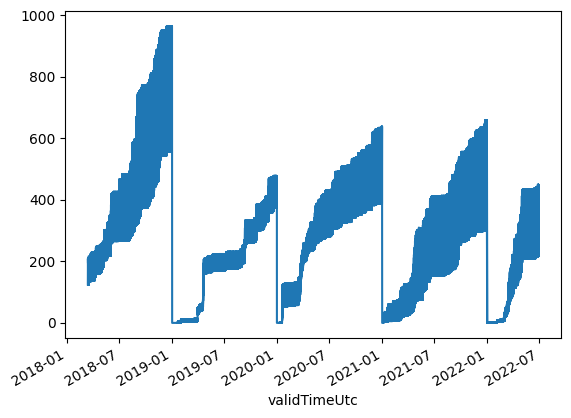

In [9]:
df["precipYtd"].plot()

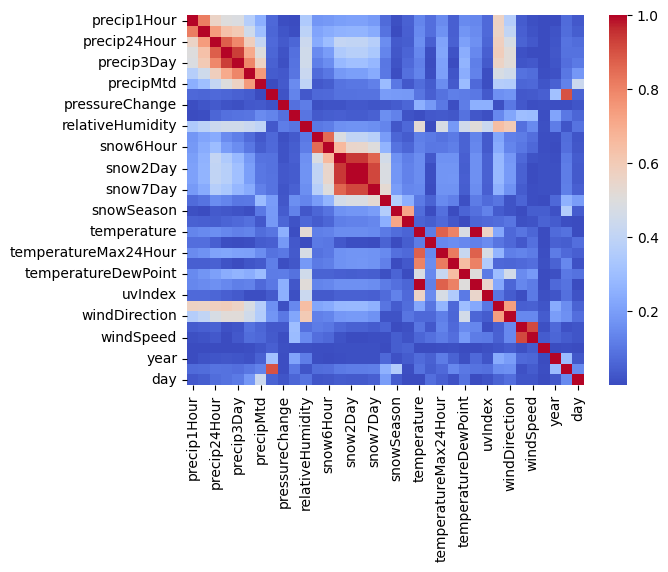

In [10]:
corr_matrix = df.dropna(how="any").corr().abs()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

# 2. Fill NaN's

In [14]:
# Groupby estacion

df_estacion_0 = df[df["ID_ESTACION"] == 0]; df_estacion_0

,precip1Hour,precip6Hour,precip24Hour,precip2Day,precip3Day,precip7Day,precipMtd,precipYtd,pressureChange,pressureMeanSeaLevel,...,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed,ID_ESTACION,year,month,day
validTimeUtc,,,,,,,,,,,,,,,,,,,,,
2015-06-29 16:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.5,NaN,...,34.7,2.0,16.09,NaN,NaN,17.3,0,2015,6,29
2015-06-29 17:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.9,NaN,...,33.6,1.0,16.09,NaN,NaN,16.9,0,2015,6,29
2015-06-29 18:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.1,NaN,...,31.9,0.0,16.09,NaN,NaN,15.5,0,2015,6,29
2015-06-29 19:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.5,NaN,...,29.7,0.0,16.09,NaN,NaN,13.7,0,2015,6,29
2015-06-29 20:20:00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.2,NaN,...,25.4,0.0,16.09,NaN,NaN,9.4,0,2015,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 19:20:00,0.0,0.0,0.0,0.0,0.0,0.1,16.0,341.0,2.4,1011.6,...,23.5,0.0,13.78,10.0,NaN,5.8,0,2022,6,30
2022-06-30 20:20:00,0.0,0.0,0.0,0.0,0.0,0.1,16.0,341.0,3.8,1013.1,...,21.7,0.0,13.26,20.0,NaN,6.8,0,2022,6,30
2022-06-30 21:20:00,0.0,0.0,0.0,0.0,0.0,0.1,16.0,341.0,4.0,1014.4,...,20.5,0.0,12.82,20.0,NaN,6.1,0,2022,6,30


In [15]:
df_estacion_0.isna().sum()

precip1Hour                    1
precip6Hour                   26
precip24Hour                   6
precip2Day                 23653
precip3Day                 23653
precip7Day                 23653
precipMtd                  23653
precipYtd                  23653
pressureChange                 1
pressureMeanSeaLevel       17807
relativeHumidity               0
snow1Hour                      1
snow6Hour                     26
snow24Hour                     6
snow2Day                   23653
snow3Day                   23653
snow7Day                   23653
snowMtd                    23653
snowSeason                 23653
snowYtd                    23653
temperature                    1
temperatureChange24Hour       19
temperatureMax24Hour           5
temperatureMin24Hour           5
temperatureDewPoint            1
temperatureFeelsLike           1
uvIndex                        1
visibility                     1
windDirection              17807
windGust                   56451
windSpeed 

## 2.1 Filling precipitations NaN's

In [16]:
# Interpolate 20 missing values

df_estacion_0["precip1Hour"] = df_estacion_0["precip1Hour"].interpolate(method="time").values

Not sure, but it looks like the aggregated values from precipXHour are wrong:

df_estacion_0.iloc[475:525][["precip1Hour","precip6Hour"]

In [17]:
# Create window features

df_estacion_0["precip6Hour"] = df_estacion_0["precip1Hour"].rolling(window=6).sum()
df_estacion_0["precip24Hour"] = df_estacion_0["precip6Hour"].rolling(window=4).sum()
df_estacion_0["precip2Day"] = df_estacion_0["precip24Hour"].rolling(window=2).sum()
df_estacion_0["precip3Day"] = df_estacion_0["precip24Hour"].rolling(window=3).sum()
df_estacion_0["precip7Day"] = df_estacion_0["precip24Hour"].rolling(window=7).sum()
df_estacion_0["precipMtd"] = df_estacion_0["precip24Hour"].rolling(window=31).sum()
df_estacion_0["precipYtd"] = df_estacion_0["precipMtd"].rolling(window=12).sum()

# Filter rows with nan's
df_estacion_0 = df_estacion_0[df_estacion_0["precipYtd"].notna()]

array([[<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>]],
      dtype=object)

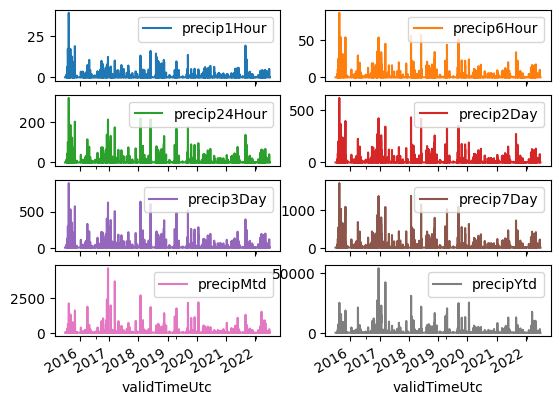

In [18]:
precip_cols = [c for c in df_estacion_0.columns if "precip" in c]
df_estacion_0[precip_cols].plot(subplots=True, layout=(4,2))

## 2.2 Filling pressureChange NaN's 

In [19]:
df_estacion_0["pressureChange"] = df_estacion_0["pressureChange"].interpolate(method="time")

## 2.3 Filling snow NaN's 

In [20]:
# Interpolate 20 missing values

df_estacion_0["snow1Hour"] = df_estacion_0["snow1Hour"].interpolate(method="time").values

In [21]:
# Create window features

df_estacion_0["snow6Hour"] = df_estacion_0["snow1Hour"].rolling(window=6).sum()
df_estacion_0["snow24Hour"] = df_estacion_0["snow6Hour"].rolling(window=4).sum()
df_estacion_0["snow2Day"] = df_estacion_0["snow24Hour"].rolling(window=2).sum()
df_estacion_0["snow3Day"] = df_estacion_0["snow24Hour"].rolling(window=3).sum()
df_estacion_0["snow7Day"] = df_estacion_0["snow24Hour"].rolling(window=7).sum()
df_estacion_0["snowMtd"] = df_estacion_0["snow24Hour"].rolling(window=31).sum()
df_estacion_0["snowYtd"] = df_estacion_0["snowMtd"].rolling(window=12).sum()

# Filter rows with nan's
df_estacion_0 = df_estacion_0[df_estacion_0["snowYtd"].notna()]

# Delete snow seasons
df_estacion_0 = df_estacion_0.drop("snowSeason", axis=1)

array([[<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>]],
      dtype=object)

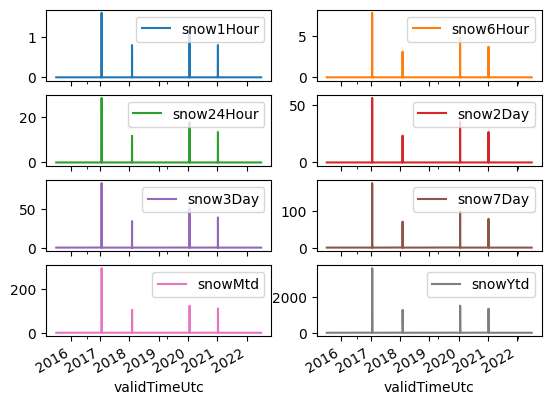

In [22]:
snow_cols = [c for c in df_estacion_0.columns if "snow" in c]
df_estacion_0[snow_cols].plot(subplots=True, layout=(4,2))

## 2.4 Filling temperature NaN's 

In [23]:
df_estacion_0["temperature"] = df_estacion_0["temperature"].interpolate(method="time")
df_estacion_0["temperatureDewPoint"] = df_estacion_0["temperatureDewPoint"].interpolate(method="time")
df_estacion_0["temperatureFeelsLike"] = df_estacion_0["temperatureFeelsLike"].interpolate(method="time")

In [24]:
# Create window features

df_estacion_0["temperatureChange24Hour"] = df_estacion_0["temperature"].rolling(window=24).sum()
df_estacion_0["temperatureMax24Hour"] = df_estacion_0["temperature"].rolling(window=24).max()
df_estacion_0["temperatureMin24Hour"] = df_estacion_0["temperature"].rolling(window=24).min()

# Filter rows with nan's
df_estacion_0 = df_estacion_0[df_estacion_0["temperatureChange24Hour"].notna()]

array([[<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>],
       [<Axes: xlabel='validTimeUtc'>, <Axes: xlabel='validTimeUtc'>]],
      dtype=object)

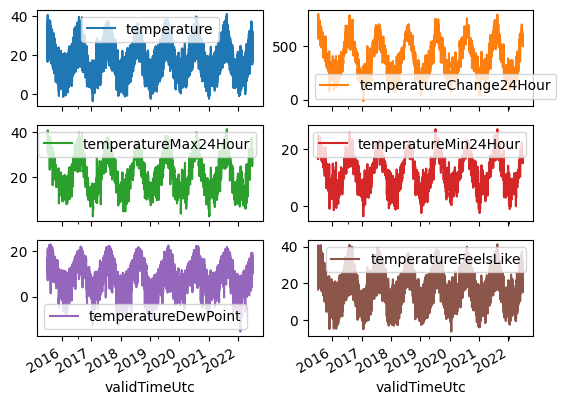

In [25]:
temperature_cols = [c for c in df_estacion_0.columns if "temperature" in c]
df_estacion_0[temperature_cols].plot(subplots=True, layout=(3,2))

## 2.5 Filling uvIndex and visibility NaN's 

In [26]:
df_estacion_0["uvIndex"] = df_estacion_0["uvIndex"].interpolate(method="time")

In [27]:
df_estacion_0["visibility"] = df_estacion_0["visibility"].interpolate(method="time")

## 2.6 Filling windGust NaN's

In [28]:
# Filter windGust feature (Boned decided it was useless)

df_estacion_0 = df_estacion_0.drop("windGust", axis=1)

## 2.7 Filling pressureMeanSeaLevel NaN's 

<Axes: xlabel='validTimeUtc'>

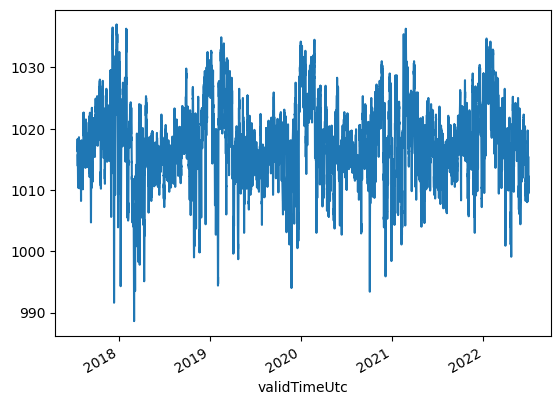

In [29]:
df_estacion_0["pressureMeanSeaLevel"].plot()

<Axes: ylabel='Frequency'>

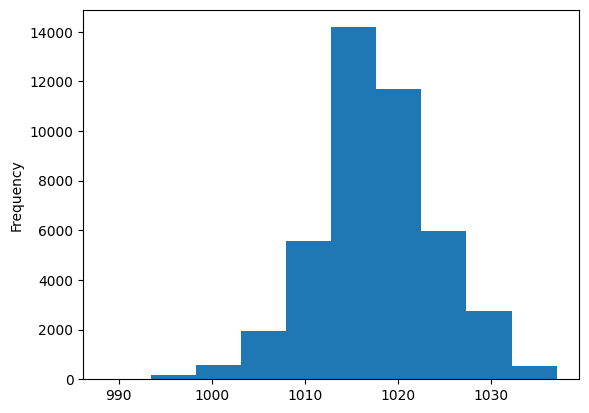

In [30]:
df_estacion_0["pressureMeanSeaLevel"].plot.hist()

In [31]:
from sklearn.linear_model import LinearRegression

train = df_estacion_0[df_estacion_0["pressureMeanSeaLevel"].notnull()]
Y_train = train["pressureMeanSeaLevel"]
X_train = train.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

test = df_estacion_0[df_estacion_0["pressureMeanSeaLevel"].isnull()]
X_test = test.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

In [32]:
len(X_train), len(Y_train), len(X_test)

(43376, 43376, 17686)

In [33]:
# create a linear regression model and fit it on the non-missing data
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)

LinearRegression()

In [34]:
# predict the missing values using the trained regression model
predicted_values = reg_model.predict(X_test)

In [35]:
# fill in the missing values in the original dataframe with the predicted values
df_estacion_0.loc[df_estacion_0["pressureMeanSeaLevel"].isnull(), "pressureMeanSeaLevel"] = predicted_values

<Axes: xlabel='validTimeUtc'>

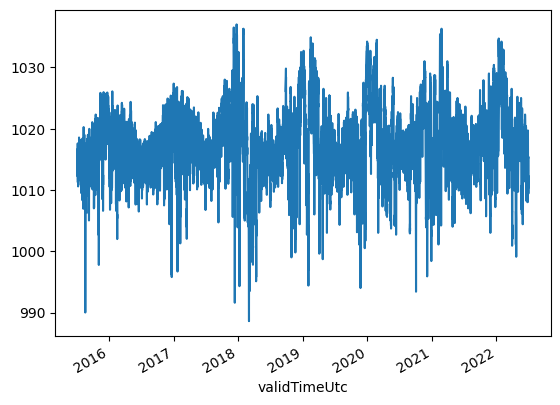

In [36]:
df_estacion_0["pressureMeanSeaLevel"].plot()

## 2.6 Filling windDirection NaN's 

In [1]:
def clip_to_interval(value):
    clip_values = np.arange(0, 360, 45)
    idx = (np.abs(clip_values - value)).argmin()
    return clip_values[idx]

In [39]:
df_estacion_0.loc[df_estacion_0["pressureMeanSeaLevel"].isnull(), "windDirection"] = df_estacion_0.loc[df_estacion_0["pressureMeanSeaLevel"].isnull(), "windDirection"].apply(lambda x: clip_to_interval(x))

<Axes: ylabel='Frequency'>

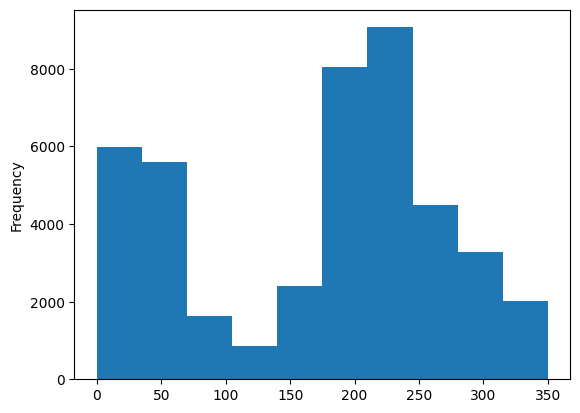

In [40]:
df_estacion_0["windDirection"].plot.hist()

In [45]:
from sklearn.neighbors import KNeighborsClassifier

train = df_estacion_0[df_estacion_0["windDirection"].notnull()]
Y_train = train["windDirection"]
X_train = train.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

test = df_estacion_0[df_estacion_0["windDirection"].isnull()]
X_test = test.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

In [46]:
len(X_train), len(Y_train), len(X_test)

(43376, 43376, 17686)

In [52]:
# fit the classifier to the training data
clf_model = KNeighborsClassifier(n_neighbors=1)
clf_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
# predict the missing values using the trained regression model
predicted_values = clf_model.predict(X_test)

In [55]:
# fill in the missing values in the original dataframe with the predicted values
df_estacion_0.loc[df_estacion_0["windDirection"].isnull(), "windDirection"] = predicted_values

<Axes: xlabel='validTimeUtc'>

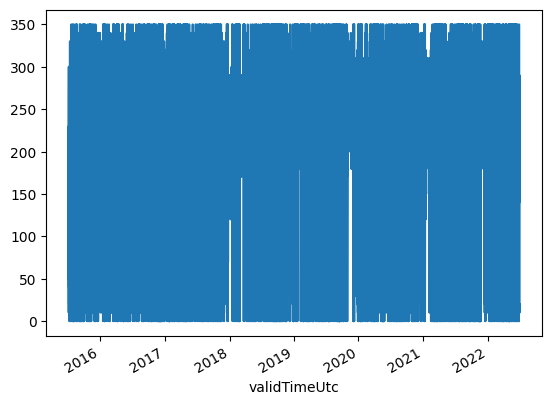

In [56]:
df_estacion_0["windDirection"].plot()

<Axes: ylabel='Frequency'>

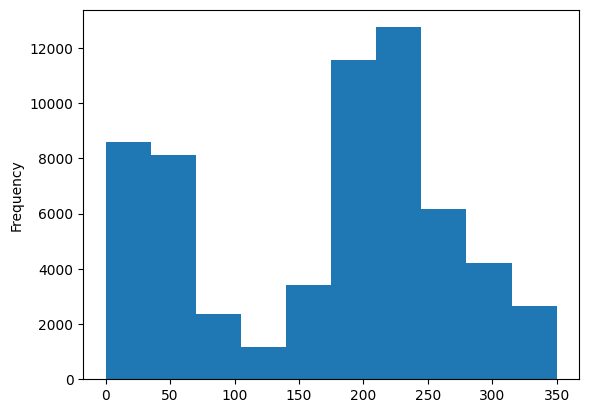

In [57]:
df_estacion_0["windDirection"].plot.hist()

In [58]:
df_estacion_0.isna().sum()

precip1Hour                0
precip6Hour                0
precip24Hour               0
precip2Day                 0
precip3Day                 0
precip7Day                 0
precipMtd                  0
precipYtd                  0
pressureChange             0
pressureMeanSeaLevel       0
relativeHumidity           0
snow1Hour                  0
snow6Hour                  0
snow24Hour                 0
snow2Day                   0
snow3Day                   0
snow7Day                   0
snowMtd                    0
snowYtd                    0
temperature                0
temperatureChange24Hour    0
temperatureMax24Hour       0
temperatureMin24Hour       0
temperatureDewPoint        0
temperatureFeelsLike       0
uvIndex                    0
visibility                 0
windDirection              0
windSpeed                  0
ID_ESTACION                0
year                       0
month                      0
day                        0
dtype: int64

In [66]:
df_estacion_0_year_month = df_estacion_0.groupby(by=[df_estacion_0.ID_ESTACION, df_estacion_0.year, df_estacion_0.month]).mean()

In [67]:
df_estacion_0_year_month

precip1Hour  precip6Hour  precip24Hour  precip2Day  \
ID_ESTACION year month                                                       
0           2015 7         0.024846     0.149074      0.596296    1.192593   
                 8         0.202083     1.212500      4.822083    9.623750   
                 9         0.216479     1.296338      5.209859   10.438732   
                 10        0.100681     0.604087      2.417847    4.836240   
                 11        0.106564     0.641899      2.569832    5.140782   
...                             ...          ...           ...         ...   
            2022 2         0.015476     0.092857      0.371429    0.742857   
                 3         0.345161     2.070968      8.283871   16.567742   
                 4         0.214722     1.285000      5.126250   10.242778   
                 5         0.072984     0.441129      1.777823    3.565054   
                 6         0.014743     0.088456      0.353825    0.707650   

                        precip3Day  precip7Day   precipMtd    precipYtd  \
ID_ESTACION year month                                                    
0           2015 7        1.788889    4.174074   17.959877   190.460494   
                 8       14.403194   33.343472  147.016250  1783.629583   
                 9       15.689155   36.869718  156.802817  1840.716197   
                 10       7.254768   16.920163   82.184877  1028.561035   
                 11       7.712570   18.009777   79.872346   958.770950   
...                            ...         ...         ...          ...   
            2022 2        1.114286    2.600000   11.514286   138.171429   
                 3       24.851613   57.987097  251.063978  2955.865188   
                 4       15.350417   35.729028  163.816250  2023.634583   
                 5        5.360887   12.594489   56.104167   674.178763   
                 6        1.061474    2.476773   10.968567   131.622809   

                        pressureChange  pressureMeanSeaLevel  ...  \
ID_ESTACION year month                                        ...   
0           2015 7           -0.045833           1014.415360  ...   
                 8            0.013750           1013.944113  ...   
                 9            0.007042           1015.080129  ...   
                 10          -0.011853           1016.329178  ...   
                 11           0.032263           1018.780609  ...   
...                                ...                   ...  ...   
            2022 2            0.010714           1024.686607  ...   
                 3           -0.093280           1017.690726  ...   
                 4            0.050694           1014.248472  ...   
                 5           -0.025134           1017.225672  ...   
                 6           -0.007928           1014.983310  ...   

                        temperatureChange24Hour  temperatureMax24Hour  \
ID_ESTACION year month                                                  
0           2015 7                   655.050309             35.113117   
                 8                   589.236111             31.135139   
                 9                   477.400282             25.653944   
                 10                  399.508583             21.717711   
                 11                  291.713408             18.748743   
...                                         ...                   ...   
            2022 2                   252.086607             16.449554   
                 3                   234.062366             12.775403   
                 4                   290.807778             16.660694   
                 5                   459.062366             25.330376   
                 6                   586.956745             31.740612   

                        temperatureMin24Hour  temperatureDewPoint  \
ID_ESTACION year month                                              
0           2015 7                 20.321296   

In [68]:
df_estacion_0_year_month.reset_index()

,ID_ESTACION,year,month,precip1Hour,precip6Hour,precip24Hour,precip2Day,precip3Day,precip7Day,precipMtd,...,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windSpeed,day
0,0,2015,7,0.024846,0.149074,0.596296,1.192593,1.788889,4.174074,17.959877,...,655.050309,35.113117,20.321296,18.024537,28.155401,2.425926,16.016127,113.595679,9.170370,17.901235
1,0,2015,8,0.202083,1.212500,4.822083,9.623750,14.403194,33.343472,147.016250,...,589.236111,31.135139,19.211528,17.974722,25.216111,2.029167,15.824181,133.236111,9.814167,15.902778
2,0,2015,9,0.216479,1.296338,5.209859,10.438732,15.689155,36.869718,156.802817,...,477.400282,25.653944,15.207324,14.705915,19.802817,1.450704,15.576225,136.732394,8.857606,15.523944
3,0,2015,10,0.100681,0.604087,2.417847,4.836240,7.254768,16.920163,82.184877,...,399.508583,21.717711,12.451499,12.772480,16.485559,0.877384,15.732207,163.433243,7.980926,16.051771
4,0,2015,11,0.106564,0.641899,2.569832,5.140782,7.712570,18.009777,79.872346,...,291.713408,18.748743,7.231844,7.822207,11.376117,0.495810,15.813198,180.712291,8.622207,15.513966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,2022,2,0.015476,0.092857,0.371429,0.742857,1.114286,2.600000,11.514286,...,252.086607,16.449554,5.982589,2.148661,9.840774,0.623512,12.170417,176.800595,7.258185,14.500000
80,0,2022,3,0.345161,2.070968,8.283871,16.567742,24.851613,57.987097,251.063978,...,234.062366,12.775403,7.373253,7.039785,8.428898,0.840054,8.303911,110.887097,10.909812,16.000000
81,0,2022,4,0.214722,1.285000,5.126250,10.242778,15.350417,35.729028,163.816250,...,290.807778,16.660694,8.213611,6.110556,11.335972,1.575000,11.674042,161.222222,10.305833,15.500000
82,0,2022,5,0.072984,0.441129,1.777823,3.565054,5.360887,12.594489,56.104167,...,459.062366,25.330376,13.195296,10.001613,19.102285,2.158602,12.442769,151.639785,6.971102,16.000000


# 3. Get aggregated daily metrics for each station

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

def clip_to_interval(value):
    clip_values = np.arange(0, 360, 45)
    idx = (np.abs(clip_values - value)).argmin()
    return clip_values[idx]
    
def custom_meteo_fillna(df_estacion_0):
    
    # Interpolate 20 missing values
    df_estacion_0["precip1Hour"] = df_estacion_0["precip1Hour"].interpolate(method="time").values

    # Create window features

    df_estacion_0["precip6Hour"] = df_estacion_0["precip1Hour"].rolling(window=6).sum()
    df_estacion_0["precip24Hour"] = df_estacion_0["precip6Hour"].rolling(window=4).sum()
    df_estacion_0["precip2Day"] = df_estacion_0["precip24Hour"].rolling(window=2).sum()
    df_estacion_0["precip3Day"] = df_estacion_0["precip24Hour"].rolling(window=3).sum()
    df_estacion_0["precip7Day"] = df_estacion_0["precip24Hour"].rolling(window=7).sum()
    df_estacion_0["precipMtd"] = df_estacion_0["precip24Hour"].rolling(window=31).sum()
    df_estacion_0["precipYtd"] = df_estacion_0["precipMtd"].rolling(window=12).sum()

    # Filter rows with nan's
    df_estacion_0 = df_estacion_0[df_estacion_0["precipYtd"].notna()]

    df_estacion_0["pressureChange"] = df_estacion_0["pressureChange"].interpolate(method="time")

    # Interpolate 20 missing values

    df_estacion_0["snow1Hour"] = df_estacion_0["snow1Hour"].interpolate(method="time").values

    # Create window features

    df_estacion_0["snow6Hour"] = df_estacion_0["snow1Hour"].rolling(window=6).sum()
    df_estacion_0["snow24Hour"] = df_estacion_0["snow6Hour"].rolling(window=4).sum()
    df_estacion_0["snow2Day"] = df_estacion_0["snow24Hour"].rolling(window=2).sum()
    df_estacion_0["snow3Day"] = df_estacion_0["snow24Hour"].rolling(window=3).sum()
    df_estacion_0["snow7Day"] = df_estacion_0["snow24Hour"].rolling(window=7).sum()
    df_estacion_0["snowMtd"] = df_estacion_0["snow24Hour"].rolling(window=31).sum()
    df_estacion_0["snowYtd"] = df_estacion_0["snowMtd"].rolling(window=12).sum()

    # Filter rows with nan's
    df_estacion_0 = df_estacion_0[df_estacion_0["snowYtd"].notna()]

    # Delete snow seasons
    df_estacion_0 = df_estacion_0.drop("snowSeason", axis=1)

    df_estacion_0["temperature"] = df_estacion_0["temperature"].interpolate(method="time")
    df_estacion_0["temperatureDewPoint"] = df_estacion_0["temperatureDewPoint"].interpolate(method="time")
    df_estacion_0["temperatureFeelsLike"] = df_estacion_0["temperatureFeelsLike"].interpolate(method="time")

    # Create window features

    df_estacion_0["temperatureChange24Hour"] = df_estacion_0["temperature"].rolling(window=24).sum()
    df_estacion_0["temperatureMax24Hour"] = df_estacion_0["temperature"].rolling(window=24).max()
    df_estacion_0["temperatureMin24Hour"] = df_estacion_0["temperature"].rolling(window=24).min()

    # Filter rows with nan's
    df_estacion_0 = df_estacion_0[df_estacion_0["temperatureChange24Hour"].notna()]

    df_estacion_0["uvIndex"] = df_estacion_0["uvIndex"].interpolate(method="time")
    df_estacion_0["visibility"] = df_estacion_0["visibility"].interpolate(method="time")

    # Filter windGust feature (Boned decided it was useless)
    df_estacion_0 = df_estacion_0.drop("windGust", axis=1)

    train = df_estacion_0[df_estacion_0["pressureMeanSeaLevel"].notnull()]
    Y_train = train["pressureMeanSeaLevel"]
    X_train = train.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

    test = df_estacion_0[df_estacion_0["pressureMeanSeaLevel"].isnull()]
    X_test = test.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

    # create a linear regression model and fit it on the non-missing data
    reg_model = LinearRegression()
    reg_model.fit(X_train, Y_train)

    # predict the missing values using the trained regression model
    predicted_values = reg_model.predict(X_test)

    # fill in the missing values in the original dataframe with the predicted values
    df_estacion_0.loc[df_estacion_0["pressureMeanSeaLevel"].isnull(), "pressureMeanSeaLevel"] = predicted_values

    df_estacion_0.loc[df_estacion_0["pressureMeanSeaLevel"].isnull(), "windDirection"] = df_estacion_0.loc[df_estacion_0["pressureMeanSeaLevel"].isnull(), "windDirection"].apply(lambda x: clip_to_interval(x))

    train = df_estacion_0[df_estacion_0["windDirection"].notnull()]
    Y_train = train["windDirection"]
    X_train = train.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

    test = df_estacion_0[df_estacion_0["windDirection"].isnull()]
    X_test = test.drop(["pressureMeanSeaLevel", "windDirection"], axis=1)

    # fit the classifier to the training data
    clf_model = KNeighborsClassifier(n_neighbors=1)
    clf_model.fit(X_train, Y_train)

    # predict the missing values using the trained regression model
    predicted_values = clf_model.predict(X_test)

    # fill in the missing values in the original dataframe with the predicted values
    df_estacion_0.loc[df_estacion_0["windDirection"].isnull(), "windDirection"] = predicted_values
    
    return df_estacion_0

In [12]:
df_clean = pd.DataFrame([])

In [13]:
for id_estacion in df["ID_ESTACION"].unique():
    print("ID estacion:", id_estacion)
    df_estacion = df[df["ID_ESTACION"] == id_estacion]
    df_estacion_clean = custom_meteo_fillna(df_estacion)
    df_clean = pd.concat([df_clean, df_estacion_clean])

ID estacion: 13
ID estacion: 18
ID estacion: 2
ID estacion: 9
ID estacion: 4
ID estacion: 11
ID estacion: 12
ID estacion: 10
ID estacion: 7
ID estacion: 15
ID estacion: 17
ID estacion: 3
ID estacion: 19
ID estacion: 14
ID estacion: 6
ID estacion: 0
ID estacion: 5
ID estacion: 1
ID estacion: 16
ID estacion: 8


In [14]:
df_clean

,precip1Hour,precip6Hour,precip24Hour,precip2Day,precip3Day,precip7Day,precipMtd,precipYtd,pressureChange,pressureMeanSeaLevel,...,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windSpeed,ID_ESTACION,year,month,day
validTimeUtc,,,,,,,,,,,,,,,,,,,,,
2015-07-04 18:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,1013.160771,...,14.4,30.8,0.0,16.09,160.0,16.6,13,2015,7,4
2015-07-04 19:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,1014.279297,...,15.9,28.6,0.0,16.09,150.0,15.1,13,2015,7,4
2015-07-04 20:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1014.702846,...,16.2,25.2,0.0,16.09,160.0,11.9,13,2015,7,4
2015-07-04 22:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,1015.371529,...,16.2,23.1,0.0,16.09,210.0,8.6,13,2015,7,4
2015-07-04 23:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1015.314004,...,14.7,21.7,0.0,16.09,210.0,6.5,13,2015,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 19:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7,1011.900000,...,12.9,25.1,0.0,13.55,110.0,10.8,8,2022,6,30
2022-06-30 20:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7,1013.100000,...,13.9,22.9,0.0,13.59,80.0,9.0,8,2022,6,30
2022-06-30 21:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8,1014.400000,...,14.4,21.0,0.0,13.85,80.0,7.9,8,2022,6,30


In [1]:
df_clean.to_csv("../data/DATOS_METEO_CLEAN.csv", header=True, index=False)

NameError: name 'df_clean' is not defined

In [9]:
import os
import pandas as pd
def load(path, sep="|"):
    return pd.read_csv(path, sep=sep)
ROOT = os.path.dirname(os.getcwd())+"/data"


In [10]:
df_clean = load(ROOT+"/DATOS_METEO_CLEAN.csv", sep=",")


In [11]:
df_clean.columns

Index(['precip1Hour', 'precip6Hour', 'precip24Hour', 'precip2Day',
       'precip3Day', 'precip7Day', 'precipMtd', 'precipYtd', 'pressureChange',
       'pressureMeanSeaLevel', 'relativeHumidity', 'snow1Hour', 'snow6Hour',
       'snow24Hour', 'snow2Day', 'snow3Day', 'snow7Day', 'snowMtd', 'snowYtd',
       'temperature', 'temperatureChange24Hour', 'temperatureMax24Hour',
       'temperatureMin24Hour', 'temperatureDewPoint', 'temperatureFeelsLike',
       'uvIndex', 'visibility', 'windDirection', 'windSpeed', 'ID_ESTACION',
       'year', 'month', 'day'],
      dtype='object')

In [12]:
# Rename year to CAMPAÑA
df_clean_renamed = df_clean.rename(columns={"year": "CAMPAÑA"})
df_clean_renamed["CAMPAÑA"] = df_clean_renamed["CAMPAÑA"] - 2000

# Pivot the DataFrame
pivot_df = df_clean_renamed.pivot_table(index=['ID_ESTACION', 'CAMPAÑA'], columns=['month', 'day'])

# Flatten the column MultiIndex
pivot_df.columns = ['{}_month_{}_day_{}'.format(feature, month, day) for feature, month, day in pivot_df.columns]

# Reset the index
df_aggregated_day = pivot_df.reset_index()

# First and last days are NaN's, fill them with
df_aggregated_day = df_aggregated_day.fillna(method='bfill', axis=1)
df_aggregated_day = df_aggregated_day.fillna(method='ffill', axis=1)

# Output the resulting DataFrame
display(df_aggregated_day)

,ID_ESTACION,CAMPAÑA,precip1Hour_month_1_day_1,precip1Hour_month_1_day_2,precip1Hour_month_1_day_3,precip1Hour_month_1_day_4,precip1Hour_month_1_day_5,precip1Hour_month_1_day_6,precip1Hour_month_1_day_7,precip1Hour_month_1_day_8,...,windSpeed_month_12_day_22,windSpeed_month_12_day_23,windSpeed_month_12_day_24,windSpeed_month_12_day_25,windSpeed_month_12_day_26,windSpeed_month_12_day_27,windSpeed_month_12_day_28,windSpeed_month_12_day_29,windSpeed_month_12_day_30,windSpeed_month_12_day_31
0,0.0,15.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,5.787500,5.187500,5.008333,5.475000,5.508333,7.579167,6.558333,7.120833,9.856522,9.641667
1,0.0,16.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,4.086957,3.491667,2.441667,7.158333,3.958333,3.120833,7.212500,4.191667,2.141667,3.316667
2,0.0,17.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,6.870833,2.354167,8.920833,9.462500,19.358333,27.670833,17.812500,14.245833,13.337500,16.562500
3,0.0,18.0,0.0000,0.0,0.0,0.0,0.000000,0.004167,0.000000,0.0000,...,5.983333,6.020833,5.016667,2.641667,7.254167,3.495833,3.600000,3.004167,2.487500,5.704167
4,0.0,19.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,27.079167,11.387500,6.679167,5.366667,4.804167,3.795833,2.579167,2.837500,2.479167,3.962500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,19.0,18.0,0.0000,0.0,0.0,0.0,0.000000,0.133333,0.000000,0.0000,...,5.266667,4.900000,4.770833,3.229167,6.483333,2.537500,4.879167,5.295833,4.508333,5.191667
156,19.0,19.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,33.766667,12.908333,6.616667,5.016667,6.341667,3.845833,2.862500,2.933333,2.883333,4.208333
157,19.0,20.0,0.0000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0000,...,5.529167,7.616667,5.900000,12.162500,8.587500,13.908333,24.225000,18.641667,13.512500,12.358333
158,19.0,21.0,0.0125,0.0,0.0,0.0,0.000000,0.029167,0.604545,0.8125,...,4.962500,5.970833,8.979167,9.579167,13.750000,21.187500,22.070833,9.970833,4.745833,4.920833


In [13]:
df_aggregated_day.to_csv("../data/DATOS_METEO_AGG_DAY.csv", header=True, index=False)

In [43]:
# Rename year to CAMPAÑA
df_clean_renamed = df_clean.rename(columns={"year": "CAMPAÑA"})
df_clean_renamed["CAMPAÑA"] = df_clean_renamed["CAMPAÑA"] - 2000

# Pivot the DataFrame
pivot_df = df_clean_renamed.pivot_table(index=['ID_ESTACION', 'CAMPAÑA'], columns=['month'])

# Flatten the column MultiIndex
pivot_df.columns = ['{}_month_{}'.format(feature, month) for feature, month in pivot_df.columns]

# Reset the index
df_aggregated_month = pivot_df.reset_index()

# First and last days are NaN's, fill them with
df_aggregated_month = df_aggregated_month.fillna(method='bfill', axis=1)
df_aggregated_month = df_aggregated_month.fillna(method='ffill', axis=1)

# Output the resulting DataFrame
display(df_aggregated_month)

,ID_ESTACION,CAMPAÑA,day_month_1,day_month_2,day_month_3,day_month_4,day_month_5,day_month_6,day_month_7,day_month_8,...,windSpeed_month_3,windSpeed_month_4,windSpeed_month_5,windSpeed_month_6,windSpeed_month_7,windSpeed_month_8,windSpeed_month_9,windSpeed_month_10,windSpeed_month_11,windSpeed_month_12
0,0.0,15.0,17.901235,17.901235,17.901235,17.901235,17.901235,17.901235,17.901235,15.902778,...,9.170370,9.170370,9.170370,9.170370,9.170370,9.814167,8.857606,7.980926,8.622207,5.986468
1,0.0,16.0,15.967524,15.149341,16.119178,15.504213,16.065663,15.481066,16.028417,15.983849,...,11.757808,10.799157,11.103694,10.551753,10.182003,10.287079,9.084270,6.865722,9.444073,6.642915
2,0.0,17.0,15.978437,14.492537,15.995929,15.557263,16.029891,15.485396,15.955405,16.000000,...,10.836635,8.297905,7.906114,7.829207,6.872432,7.235081,8.506389,5.754032,7.001558,11.639785
3,0.0,18.0,16.035088,14.562874,16.000000,15.502086,16.000000,15.500000,16.000000,16.000000,...,17.148522,12.138665,8.059543,8.263472,8.295161,7.501075,6.558472,7.653919,9.533472,7.813844
4,0.0,19.0,16.000000,14.500000,16.036437,15.500000,16.010782,15.473538,16.000000,16.000000,...,8.258435,10.926250,7.763881,8.573677,8.309140,7.446371,7.635278,6.890188,14.543750,10.213844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,19.0,18.0,16.035088,14.562874,16.000000,15.502086,16.000000,15.500000,16.000000,16.000000,...,18.793817,14.295132,9.476344,9.241528,9.591532,8.446909,7.845556,8.629595,10.639028,8.564516
156,19.0,19.0,16.000000,14.500000,16.036437,15.500000,16.010782,15.473538,16.000000,16.000000,...,9.707827,12.801528,9.186253,10.161699,9.503091,8.354704,9.153333,7.794624,17.030556,11.892876
157,19.0,20.0,16.000000,15.000000,16.000000,15.500000,15.993252,15.532033,16.020188,16.000000,...,13.223656,8.374861,8.896221,9.220891,8.344818,7.982527,8.310000,9.622715,6.740278,13.273217
158,19.0,21.0,16.026991,14.482861,16.000000,15.500000,16.000000,15.500000,16.000000,16.000000,...,10.162500,8.805694,11.140995,8.583333,9.452285,8.732124,8.875417,7.592473,10.197914,12.612634


In [44]:
df_aggregated_month.to_csv("../data/DATOS_METEO_AGG_MONTH.csv", header=True, index=False)